### Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
A=pd.read_excel("C://Users/Pratha Purwar/Desktop/DS-I/Project/Attrition Case Study.xlsx")

### Data Cleaning & Preprocessing

In [3]:
A.head(2)

Attrition  Age     BusinessTravel  DailyRate              Department  \
0          1   41      Travel_Rarely       1102                   Sales   
1          0   49  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  

[2 rows x 35 columns]

In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
A.describe()

Attrition          Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean      0.161224    36.923810   802.485714          9.192517     2.912925   
std       0.367863     9.135373   403.509100          8.106864     1.024165   
min       0.000000    18.000000   102.000000          1.000000     1.000000   
25%       0.000000    30.000000   465.000000          2.000000     2.000000   
50%       0.000000    36.000000   802.000000          7.000000     3.000000   
75%       0.000000    43.000000  1157.000000         14.000000     4.000000   
max       1.000000    60.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1.093082    20.329428   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    48.000000   
50%              1.0     1020.500000                 3.000000    66.000000   
75%              1.0     1555.750000                 4.000000    83.750000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
count     1470.000000  ...               1470.000000         1470.0   
mean         2.729932  ...                  2.712245           80.0   
std          0.711561  ...                  1.081209            0.0   
min          1.000000  ...                  1.000000           80.0   
25%          2.000000  ...                  2.000000           80.0   
50%          3.000000  ...                  3.000000           80.0   
75%          3.000000  ...                  4.000000           80.0   
max          4.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 27 columns]

In [6]:
# from the above description, we can see that EmployeeCount and StandardHours contain single unique value where EmployeeCount=1 and StandardHours=80.0 for all employees. Hence we can drop these columns
# Also, we can unserstand from the metadata that EmployeeNumber is the EmployeeId and will not affect our predictions.Hence we can drop this too.
A=A.drop(labels=["EmployeeCount","StandardHours","EmployeeNumber"],axis=1)

### Prepare data for Analysis,  Treat Missing Data, Wrong Data, Outlier Data

#### Finding missing data

In [7]:
A.isnull().sum()    

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
#As we can see above, the dataset does not contain any null values.

In [9]:
#Divide columns into Categorical and Continuous columns for analysis
cat=[]
cont=[]
for i in A.columns:
    if(A[i].dtype=="object"):
        cat.append(i)
    else:
        cont.append(i)

In [10]:
for i in cat:
    print(i,len(A[i].unique()))

BusinessTravel 3
Department 3
EducationField 6
Gender 2
JobRole 9
MaritalStatus 3
Over18 1
OverTime 2


In [11]:
for i in cont:
    print(i,len(A[i].unique()))

Attrition 2
Age 43
DailyRate 886
DistanceFromHome 29
Education 5
EnvironmentSatisfaction 4
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobSatisfaction 4
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [12]:
# As we can see in the above cat and con lists, some columns in con have <=10 unique numeric values and thus they must be categorized into categorical variables instaed of continuous.
for i in cont:
    if(len(A[i].unique())<=10):
        cat.append(i)
for i in cat:
    if i in cont:
        cont.remove(i)

In [13]:
for i in cat:
    print(i,len(A[i].unique()))

BusinessTravel 3
Department 3
EducationField 6
Gender 2
JobRole 9
MaritalStatus 3
Over18 1
OverTime 2
Attrition 2
Education 5
EnvironmentSatisfaction 4
JobInvolvement 4
JobLevel 5
JobSatisfaction 4
NumCompaniesWorked 10
PerformanceRating 2
RelationshipSatisfaction 4
StockOptionLevel 4
TrainingTimesLastYear 7
WorkLifeBalance 4


In [14]:
for i in cont:
    print(i,len(A[i].unique()))

Age 43
DailyRate 886
DistanceFromHome 29
HourlyRate 71
MonthlyIncome 1349
MonthlyRate 1427
PercentSalaryHike 15
TotalWorkingYears 40
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [15]:
print("cat",len(cat))
print("cont",len(cont))

cat 20
cont 12


#### Checking for Outliers

In [16]:
plt.figure(figsize=(40,50))
c=1
for i in cont:
    plt.subplot(4,4,c)
    c=c+1
    plt.boxplot(A[i])
    plt.xlabel(i)
    

As we can see in the given data, though there are  multiple columns which show outliers, 
but in realistic terms they are not outliers, they represent the variation in data. 
For eg.An employee can serve 40 years in a company. Although the YearsAtCompany for most of the employees are between 0-20 range, we cannot remove the employees that lie in the range beyond 20, since they represent the variation in data.

### Create new/derived predictors (e.g. Age group) for analysis

In [17]:
A[["Age"]].sort_values("Age")

Age
1311   18
457    18
972    18
301    18
296    18
...   ...
536    60
427    60
411    60
879    60
1209   60

[1470 rows x 1 columns]

Age ranges between 18-60.
In order to gain a better understanding of the relationship between age of Employee and other factors, 
we will classify the employees into different age groups:                                                                   
        -->Juniors (18-25)                                                                                                 
        -->Middle Age (26-40)                                                                                               
        -->Seniors (40+)                                                                                                   

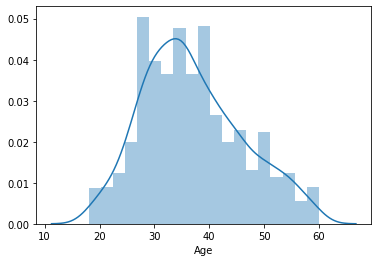

In [18]:
sb.distplot(A.Age)

In [19]:
age_group=[]
for i in A["Age"]:
    if(i<=25):
        age_group.append("Junior")
    elif(i>25 and i<=40):
        age_group.append("Middle Age")
    else:
        age_group.append("Senior")
A["Age Group"]=age_group

In [20]:
A.head()[["Age","Age Group"]]

Age   Age Group
0   41      Senior
1   49      Senior
2   37  Middle Age
3   33  Middle Age
4   27  Middle Age

### Explore the Data using Exploratory Data Analysis - For Y and all Xs

### Y=MonthlyRate

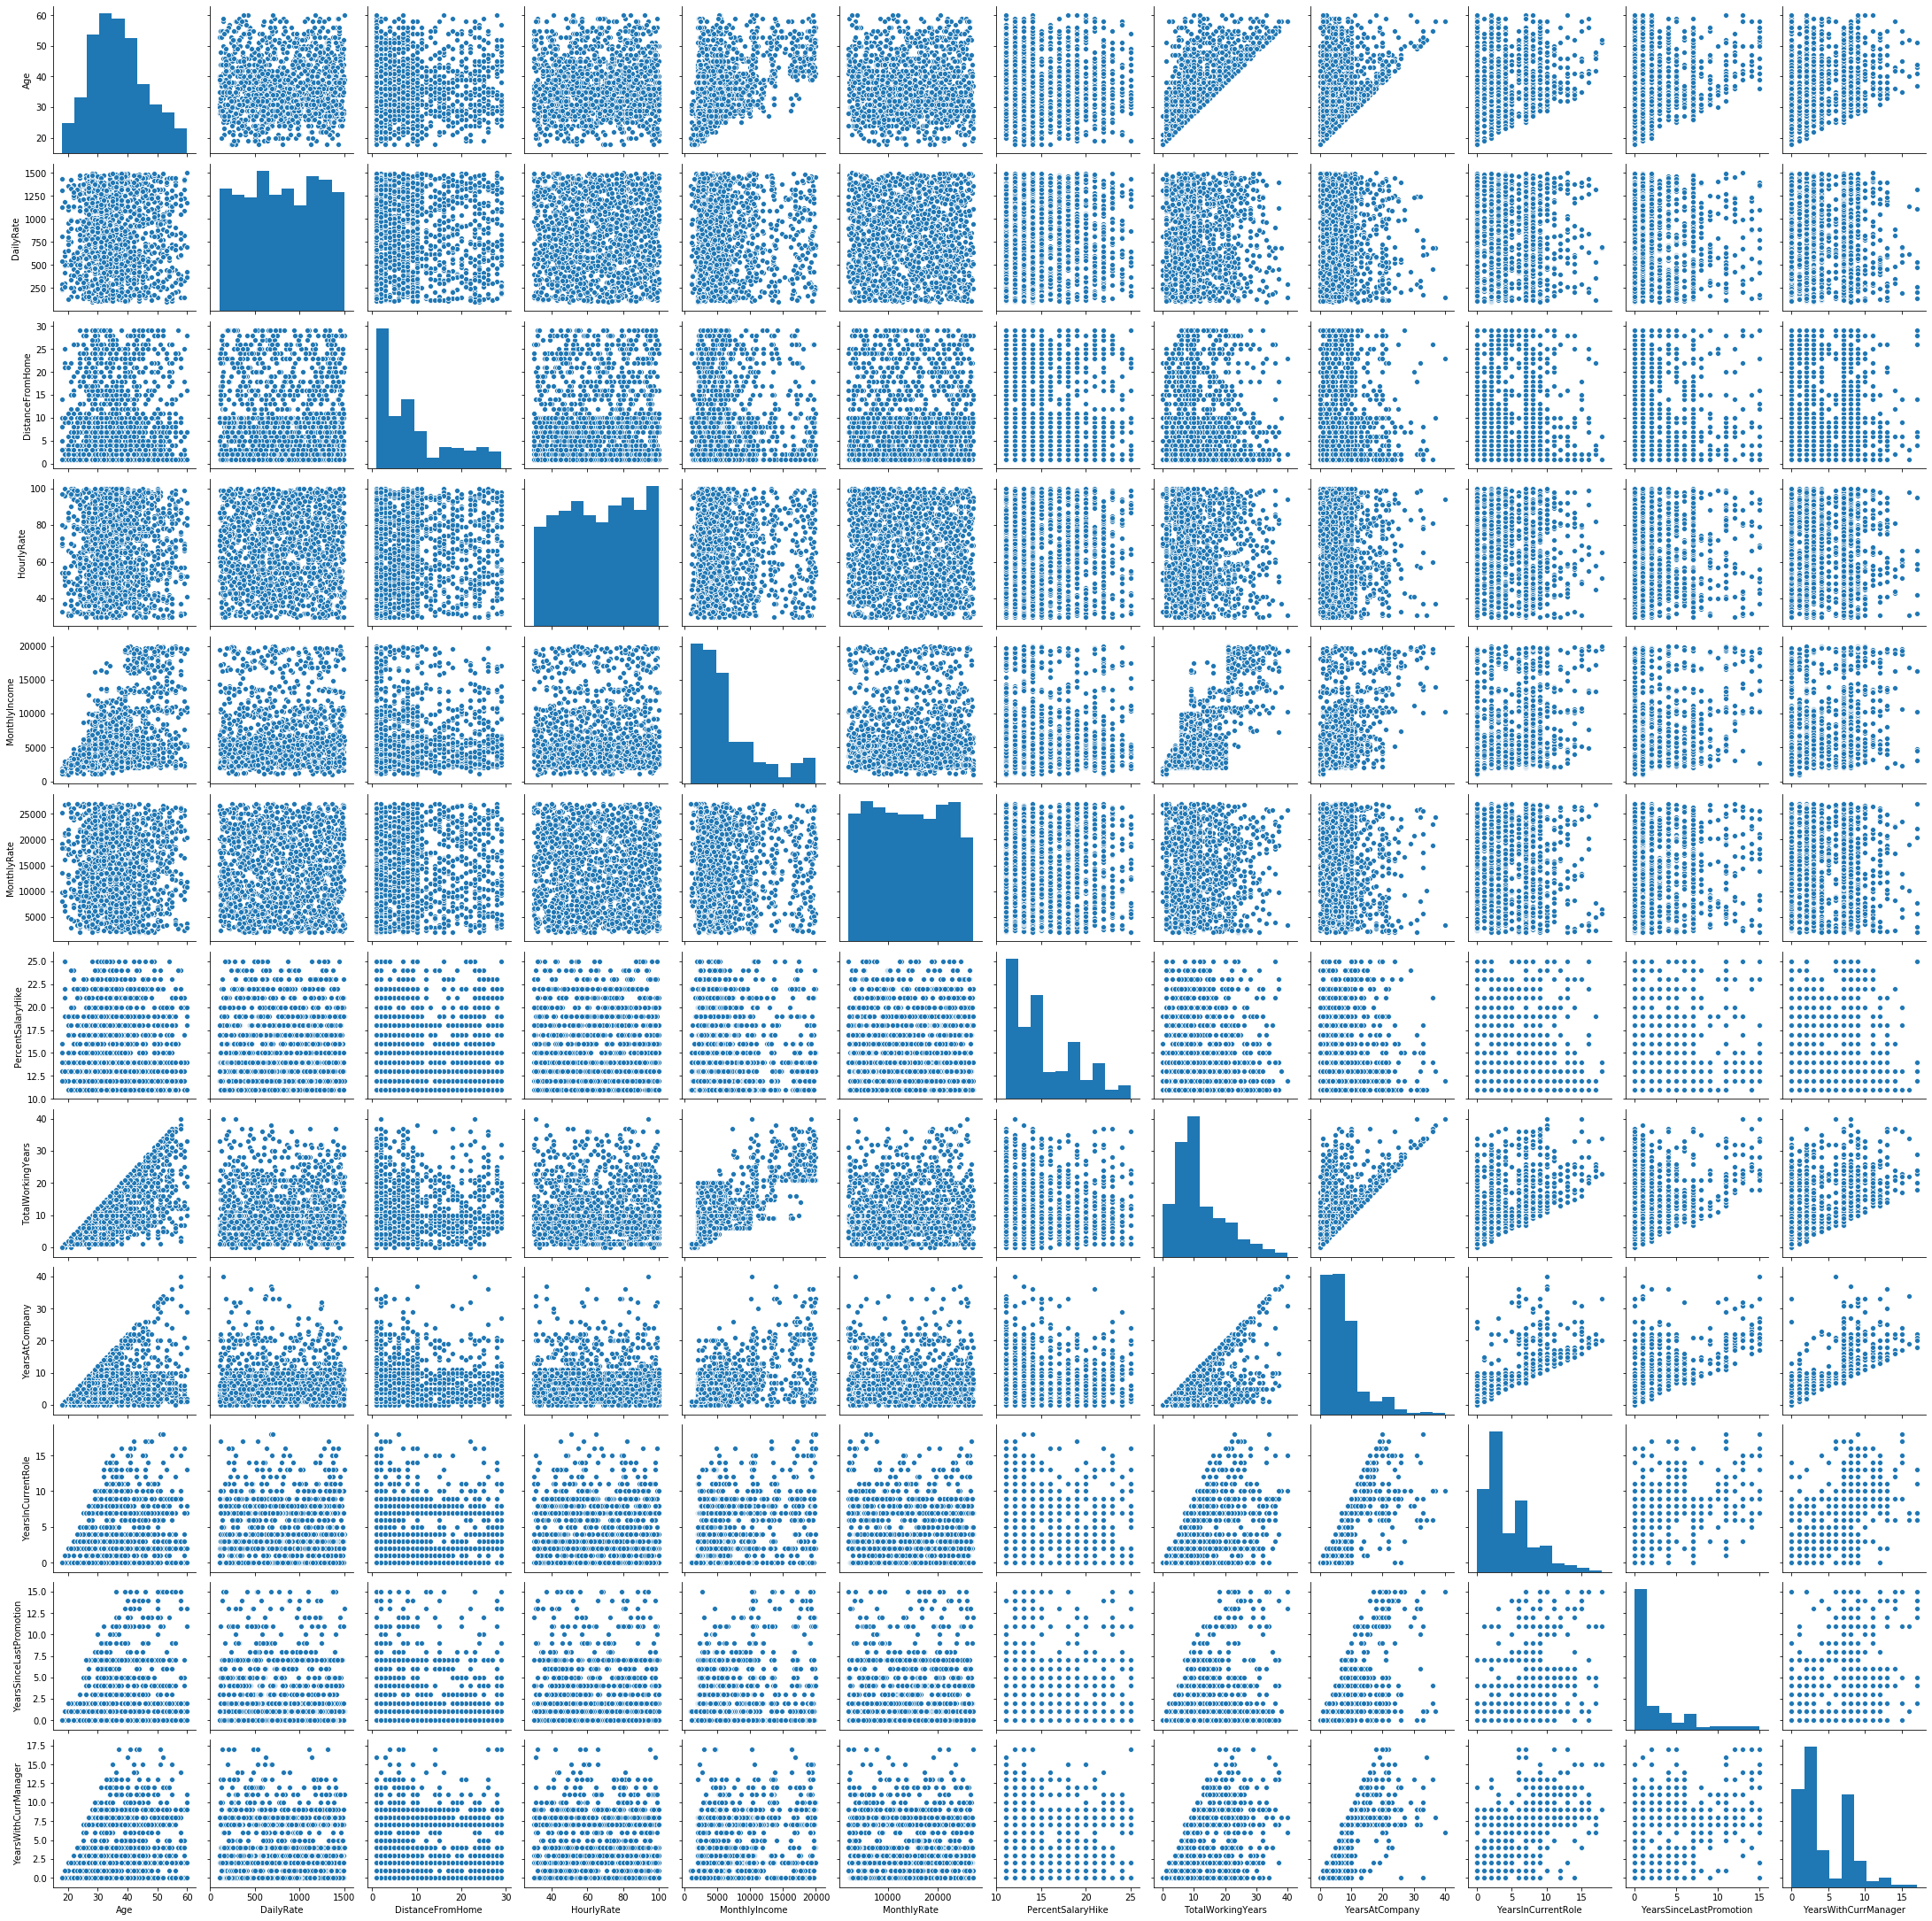

In [21]:
#Y vs Continuous variables 
sb.pairplot(A[cont])

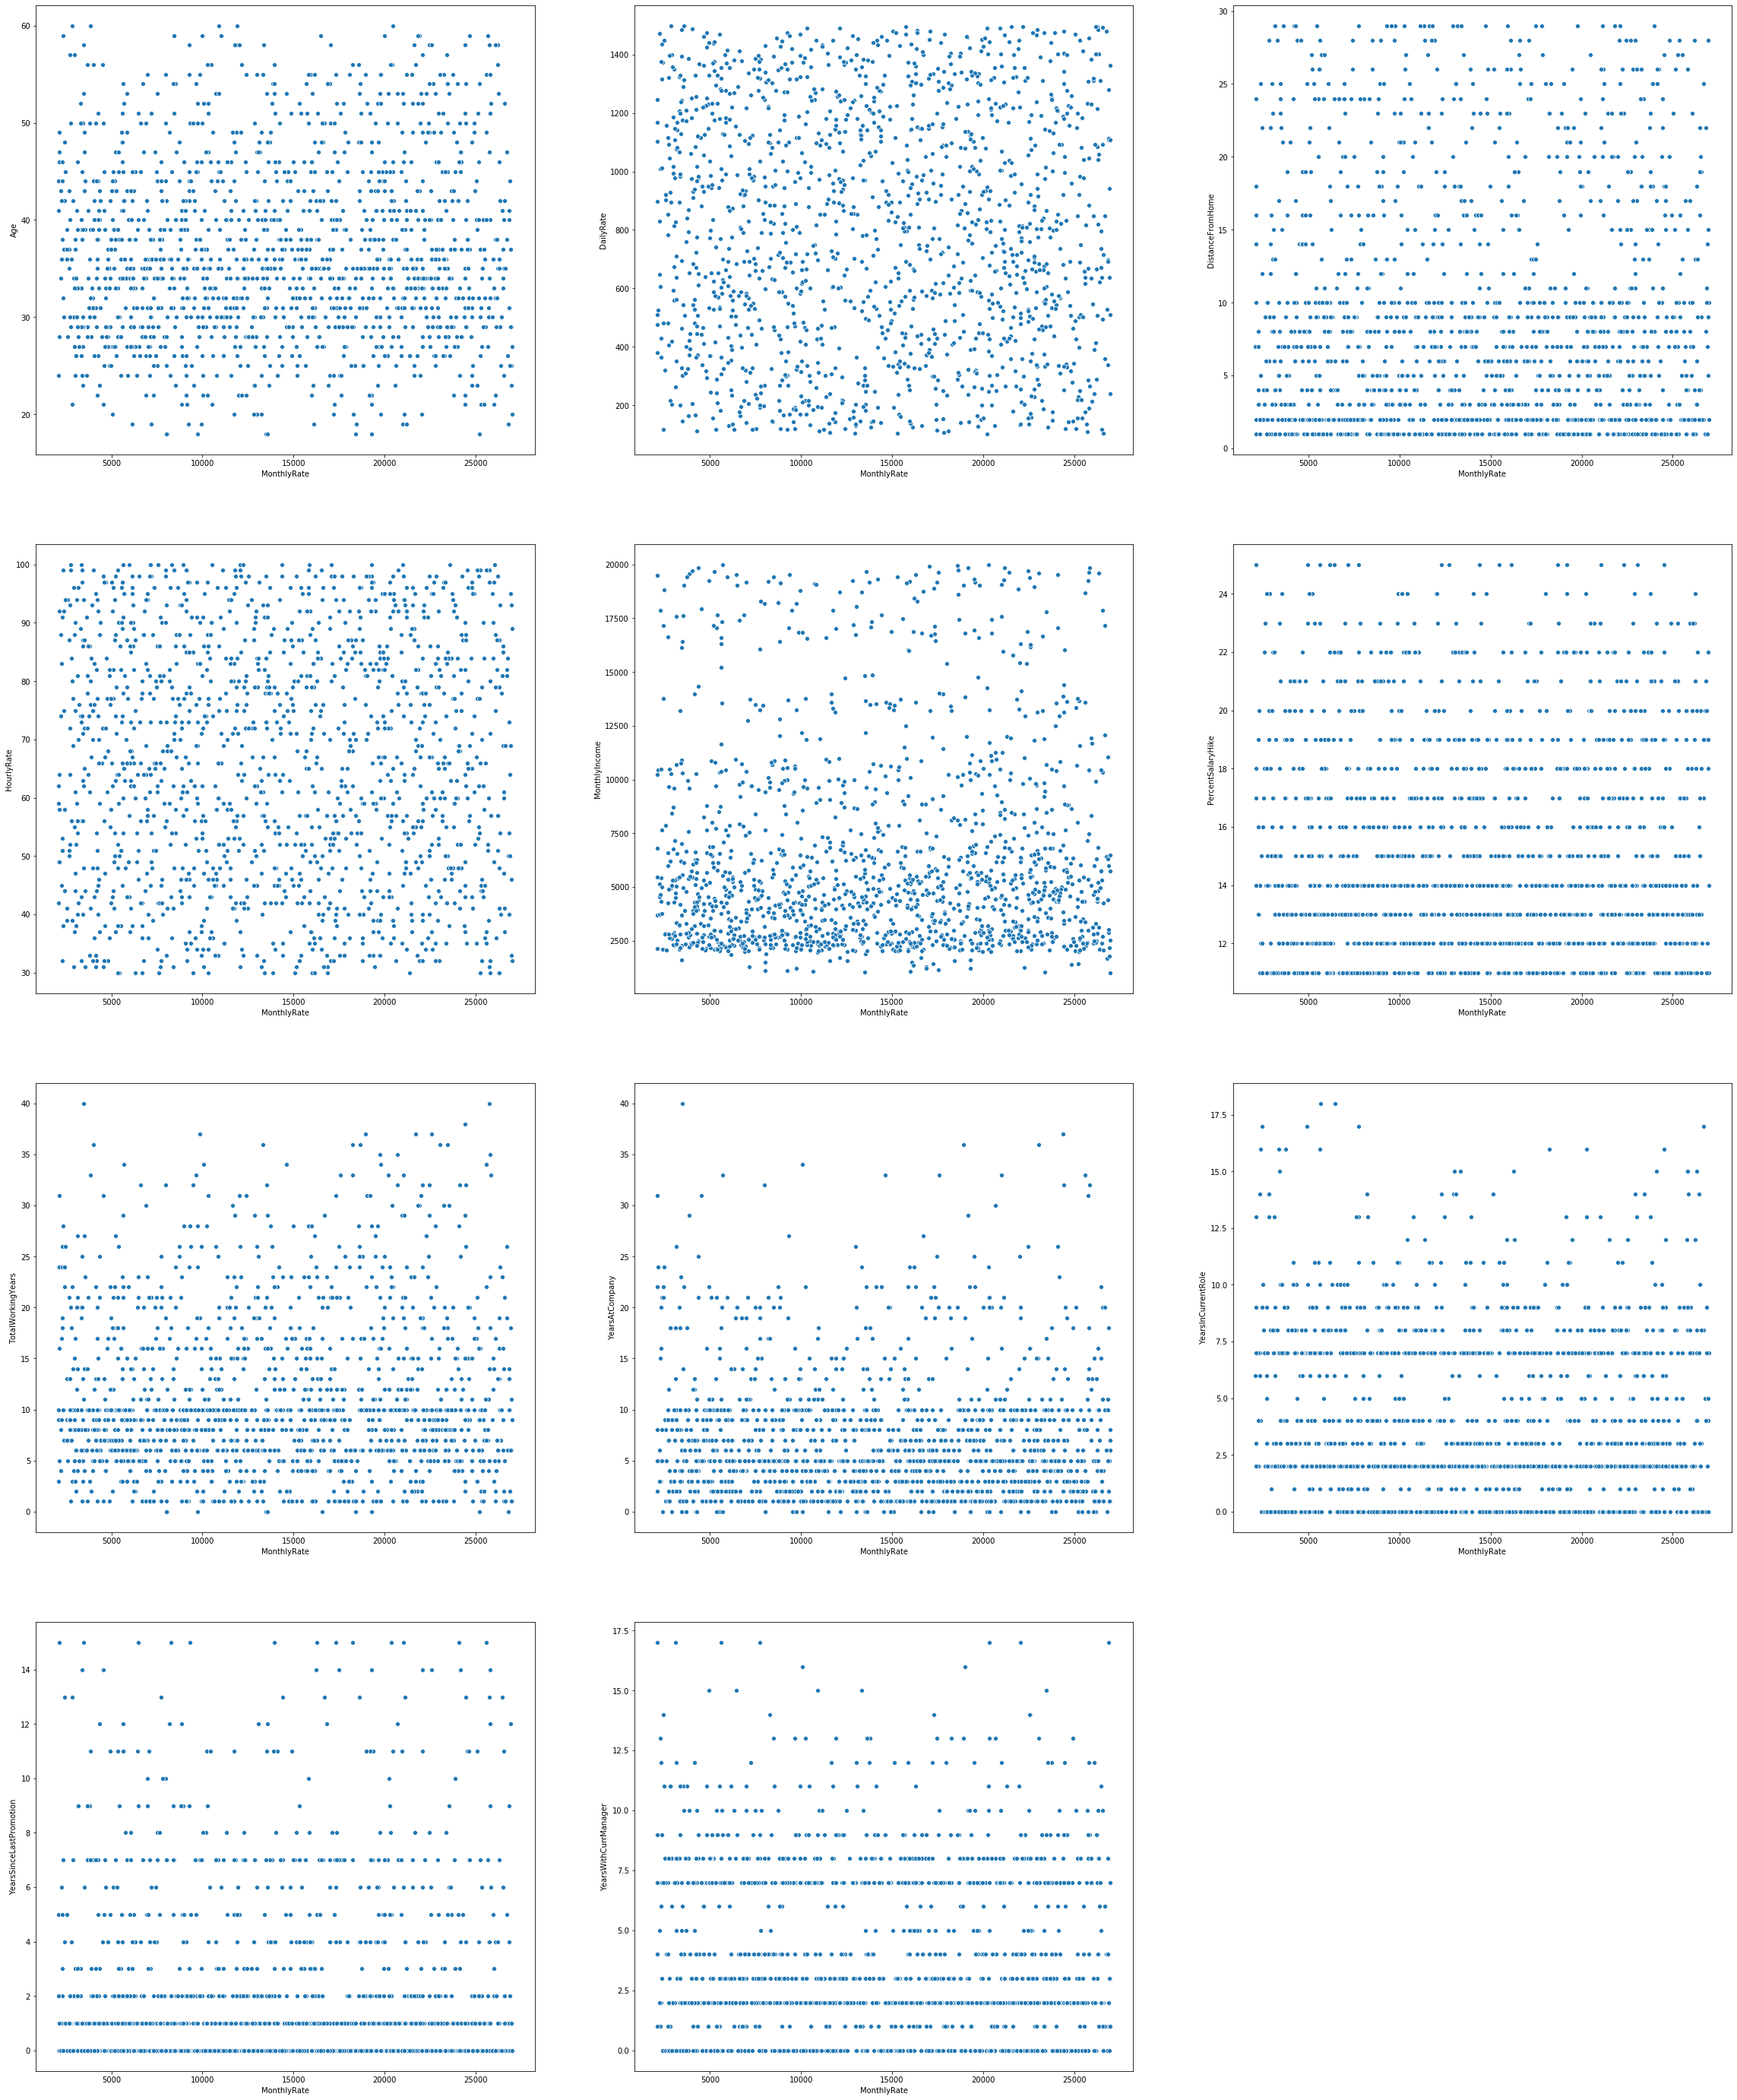

In [22]:
plt.figure(figsize=(40,50))
c=1
for i in cont:
    if(i!="MonthlyRate"):
        plt.subplot(4,3,c)
        c=c+1
        sb.scatterplot(A["MonthlyRate"],A[i])

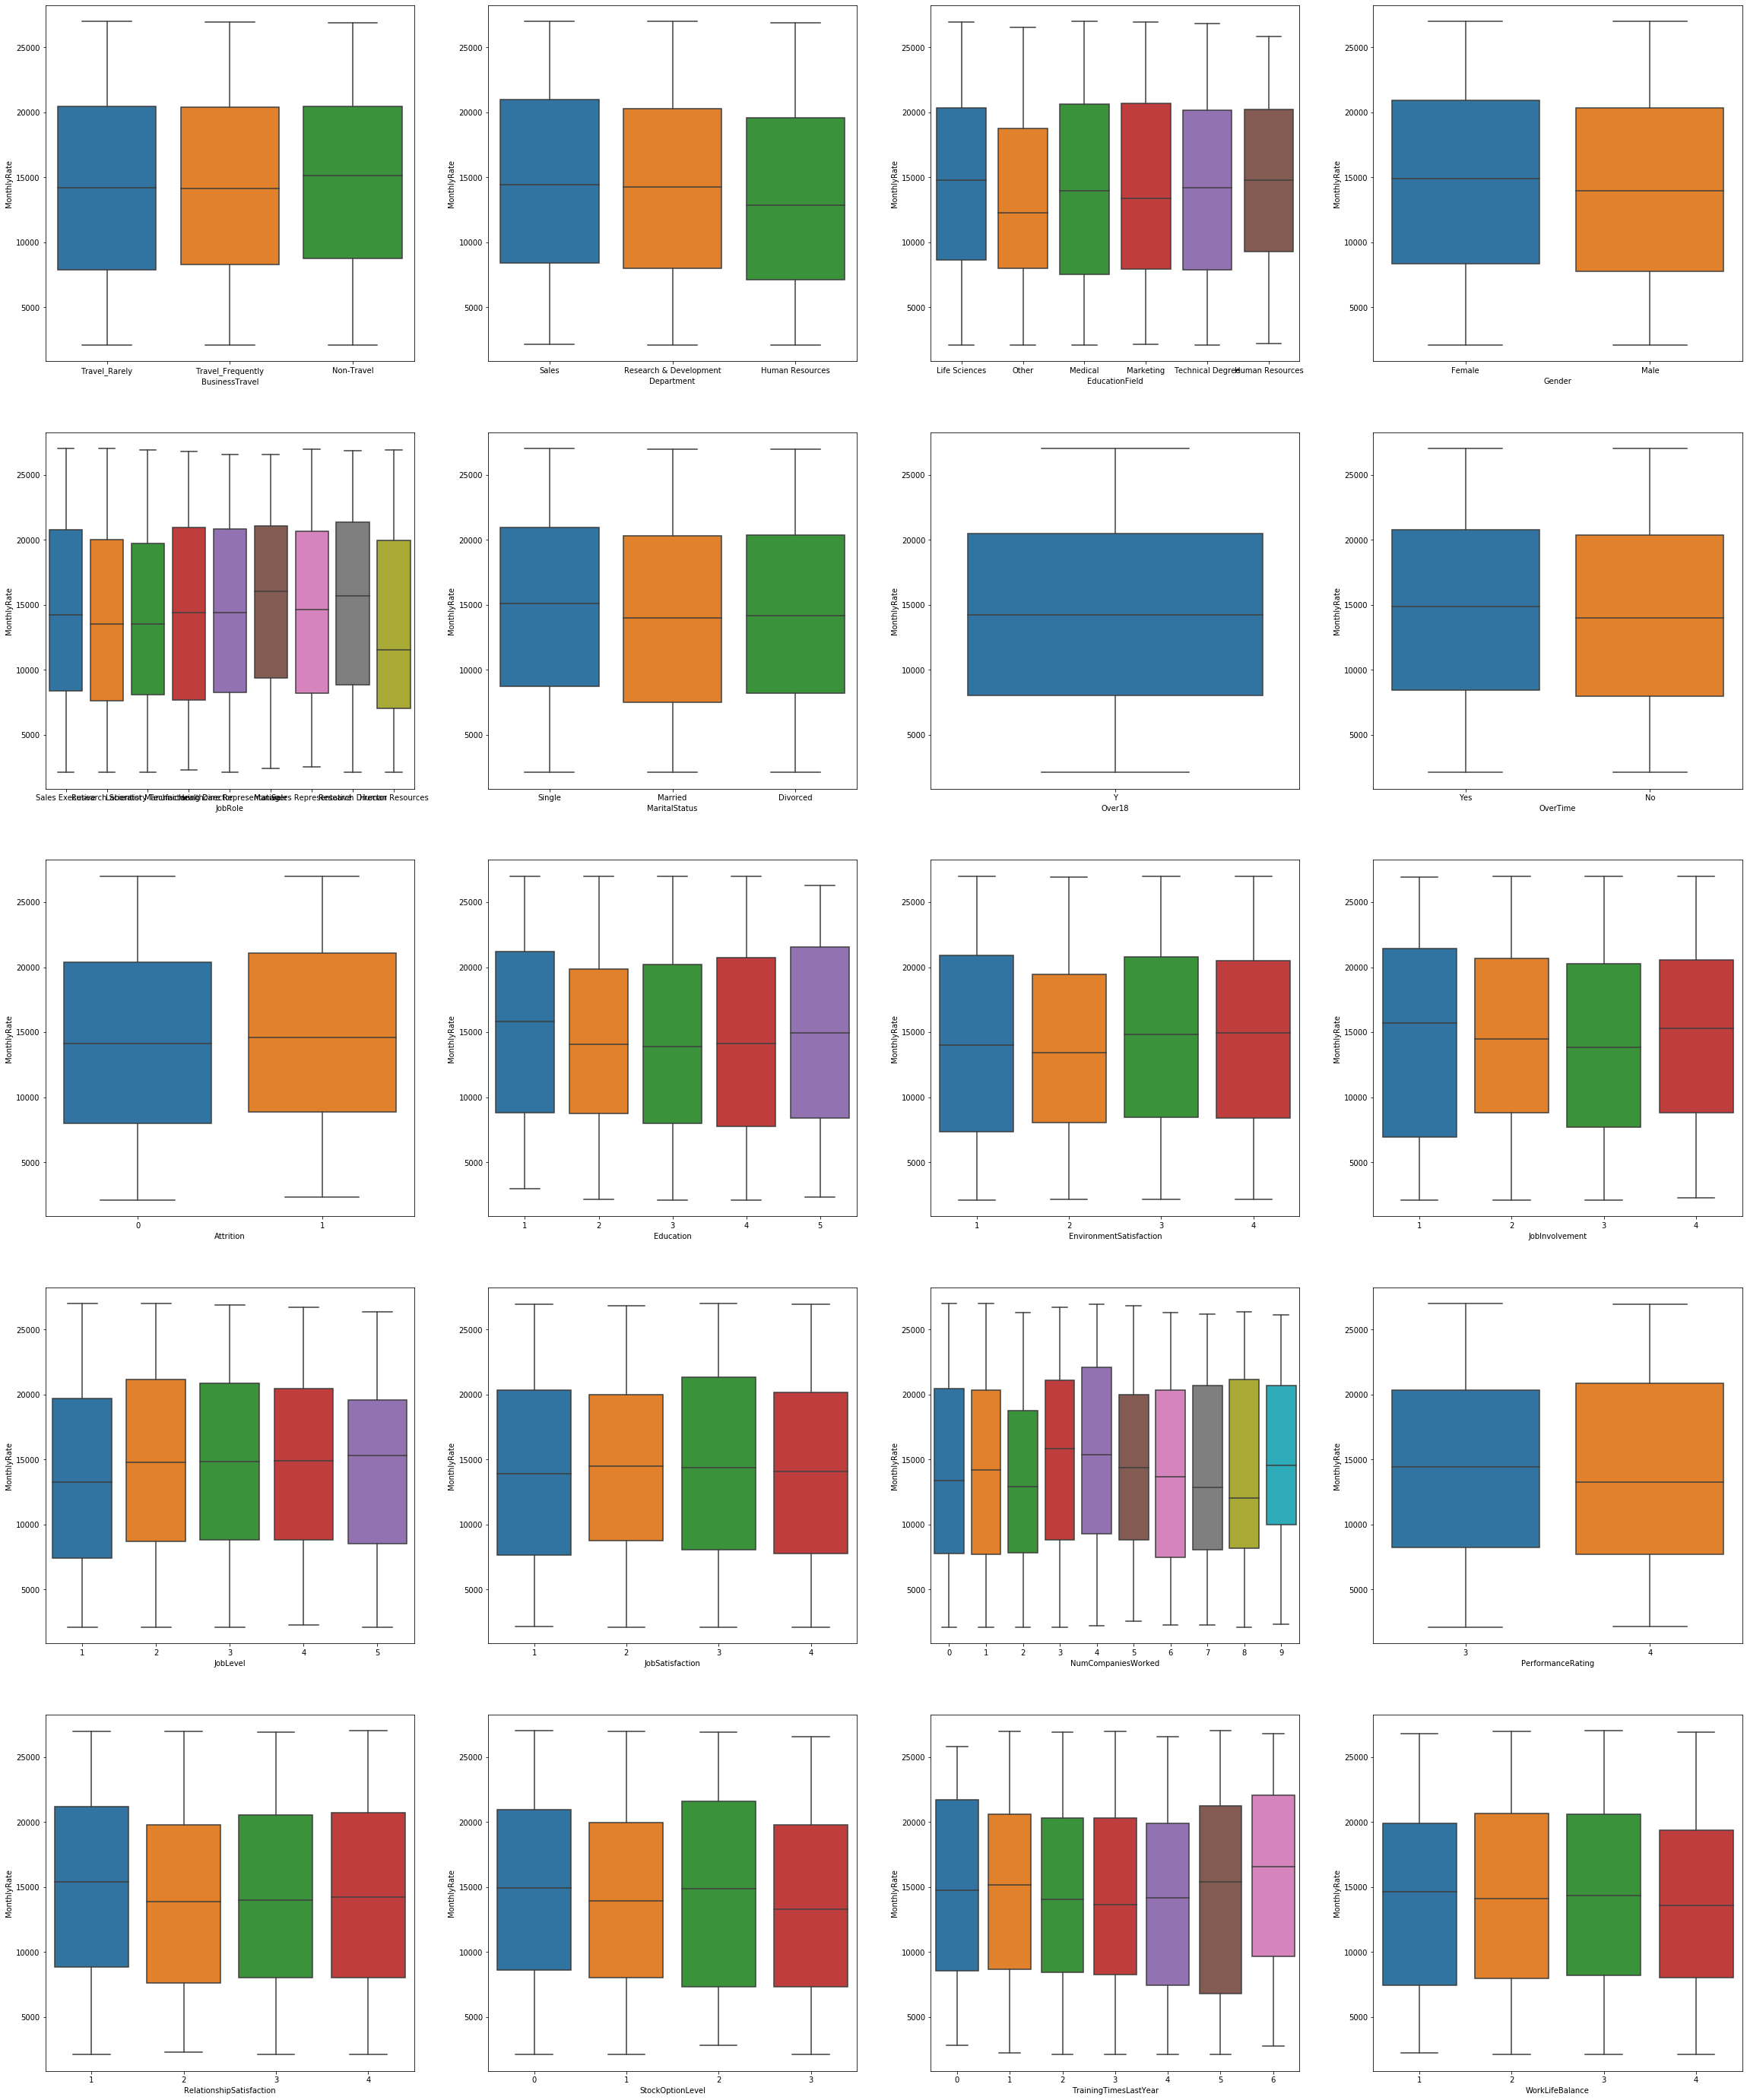

In [23]:
plt.figure(figsize=(40,50))
c=1
for i in cat:
    plt.subplot(5,4,c)
    c=c+1
    sb.boxplot(A[i],A["MonthlyRate"])

In [24]:
#From the above graphs we can see that the relationship is non-linear for both categorical and continuous data. Hence using Linear models will not give good predictions so We can't use Linear Models.
# Hence we will be using the following algorithms for prediction of MonthlyRate:
#KNN
#Decision Tree
#Random Forest
#AdaBoost

In [25]:
len(cont)

12

In [26]:
A

Attrition  Age     BusinessTravel  DailyRate              Department  \
0             1   41      Travel_Rarely       1102                   Sales   
1             0   49  Travel_Frequently        279  Research & Development   
2             1   37      Travel_Rarely       1373  Research & Development   
3             0   33  Travel_Frequently       1392  Research & Development   
4             0   27      Travel_Rarely        591  Research & Development   
...         ...  ...                ...        ...                     ...   
1465          0   36  Travel_Frequently        884  Research & Development   
1466          0   39      Travel_Rarely        613  Research & Development   
1467          0   27      Travel_Rarely        155  Research & Development   
1468          0   49  Travel_Frequently       1023                   Sales   
1469          0   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  RelationshipSatisfaction  StockOptionLevel  \
0     Female  ...                         1                 0   
1       Male  ...                         4                 1   
2       Male  ...                         2                 0   
3     Female  ...                         3                 0   
4       Male  ...                         4                 1   
...      ...  ...                       ...               ...   
1465    Male  ...                         3                 1   
1466    Male  ...                         1                 1   
1467    Male  ...                         2                 1   
1468    Male  ...                         4                 0   
1469    Male  ...                         1                 0   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                     8                     0                1              6   
1                    10                     3                3             10   
2                     7                     3                3              0   
3                     8                     3                3              8   
4                     6                     3                3              2   
...                 ...                   ...              ...            ...   
1465                 17                     3                3              5   
1466                  9                     5                3              7   
1467                  6                     0                3              6   
1468                 17                     3                2              9   
1469                  6                     3                4              4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                      4                        0                     5   
1                      7                        1                     7   
2                      0                        0                     0   
3                      7                        3                     0   
4              

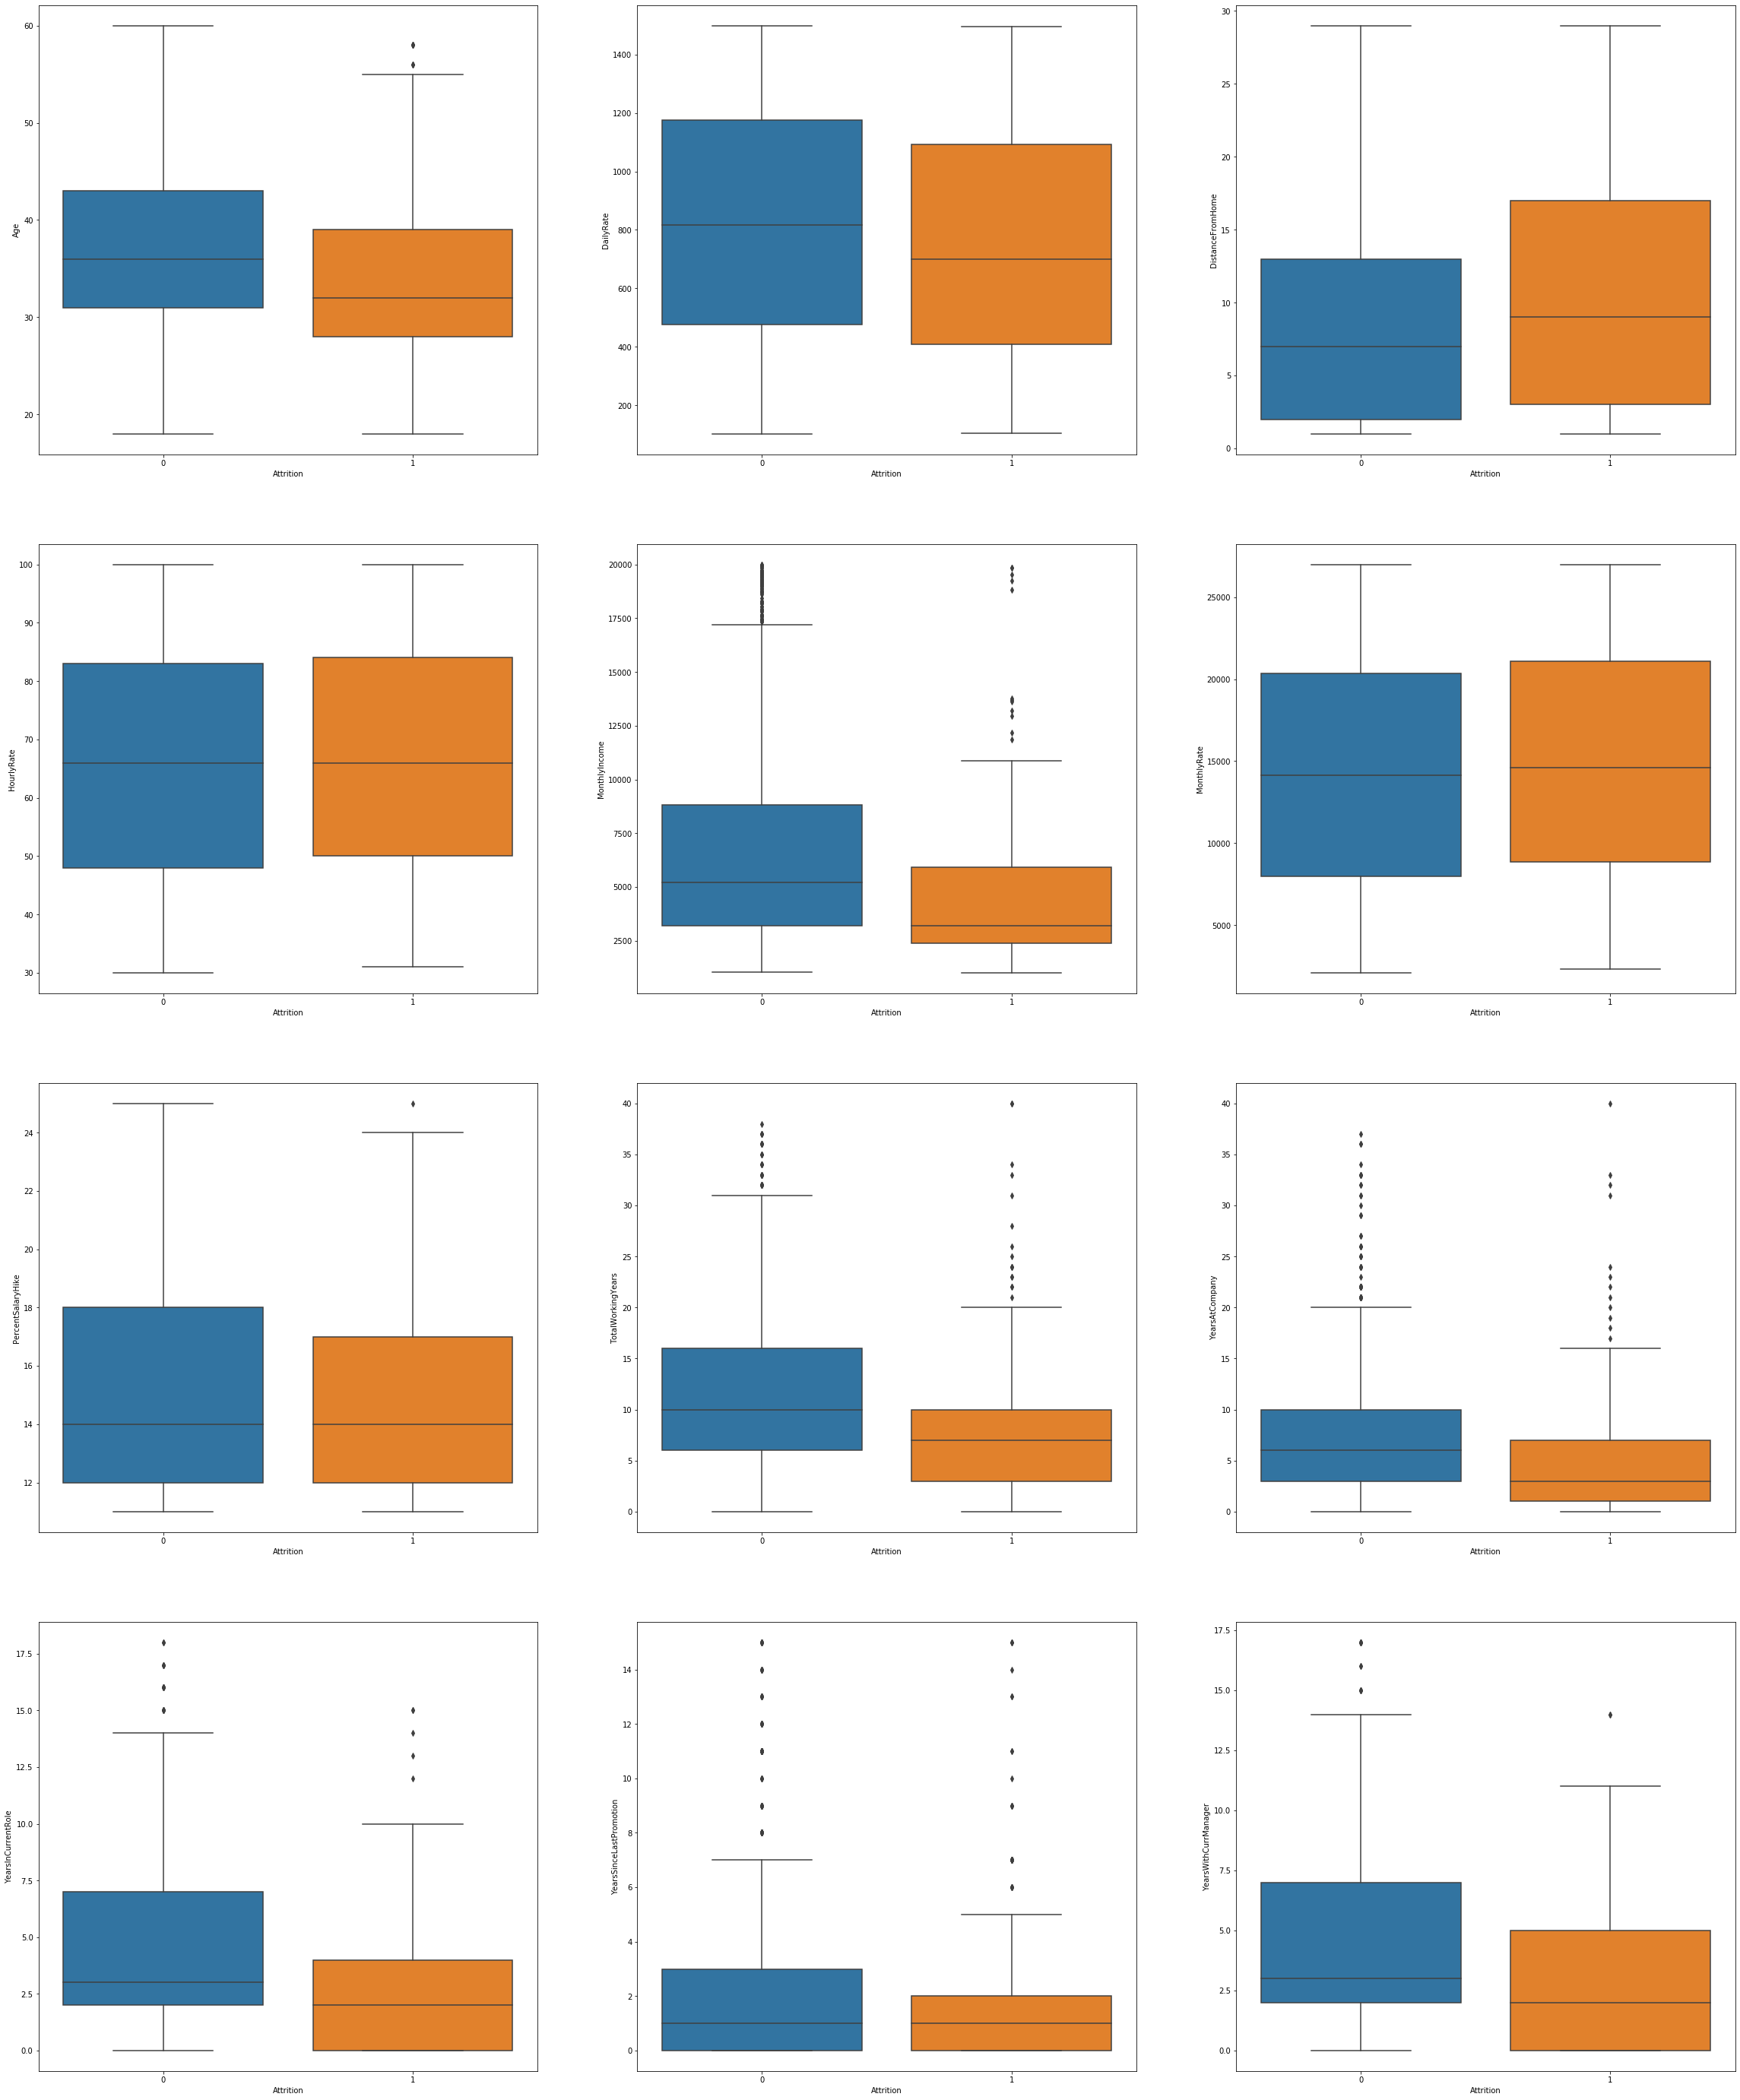

In [27]:
plt.figure(figsize=(40,50))
c=1
for i in cont:
    plt.subplot(4,3,c)
    c=c+1
    sb.boxplot(A["Attrition"],A[i])

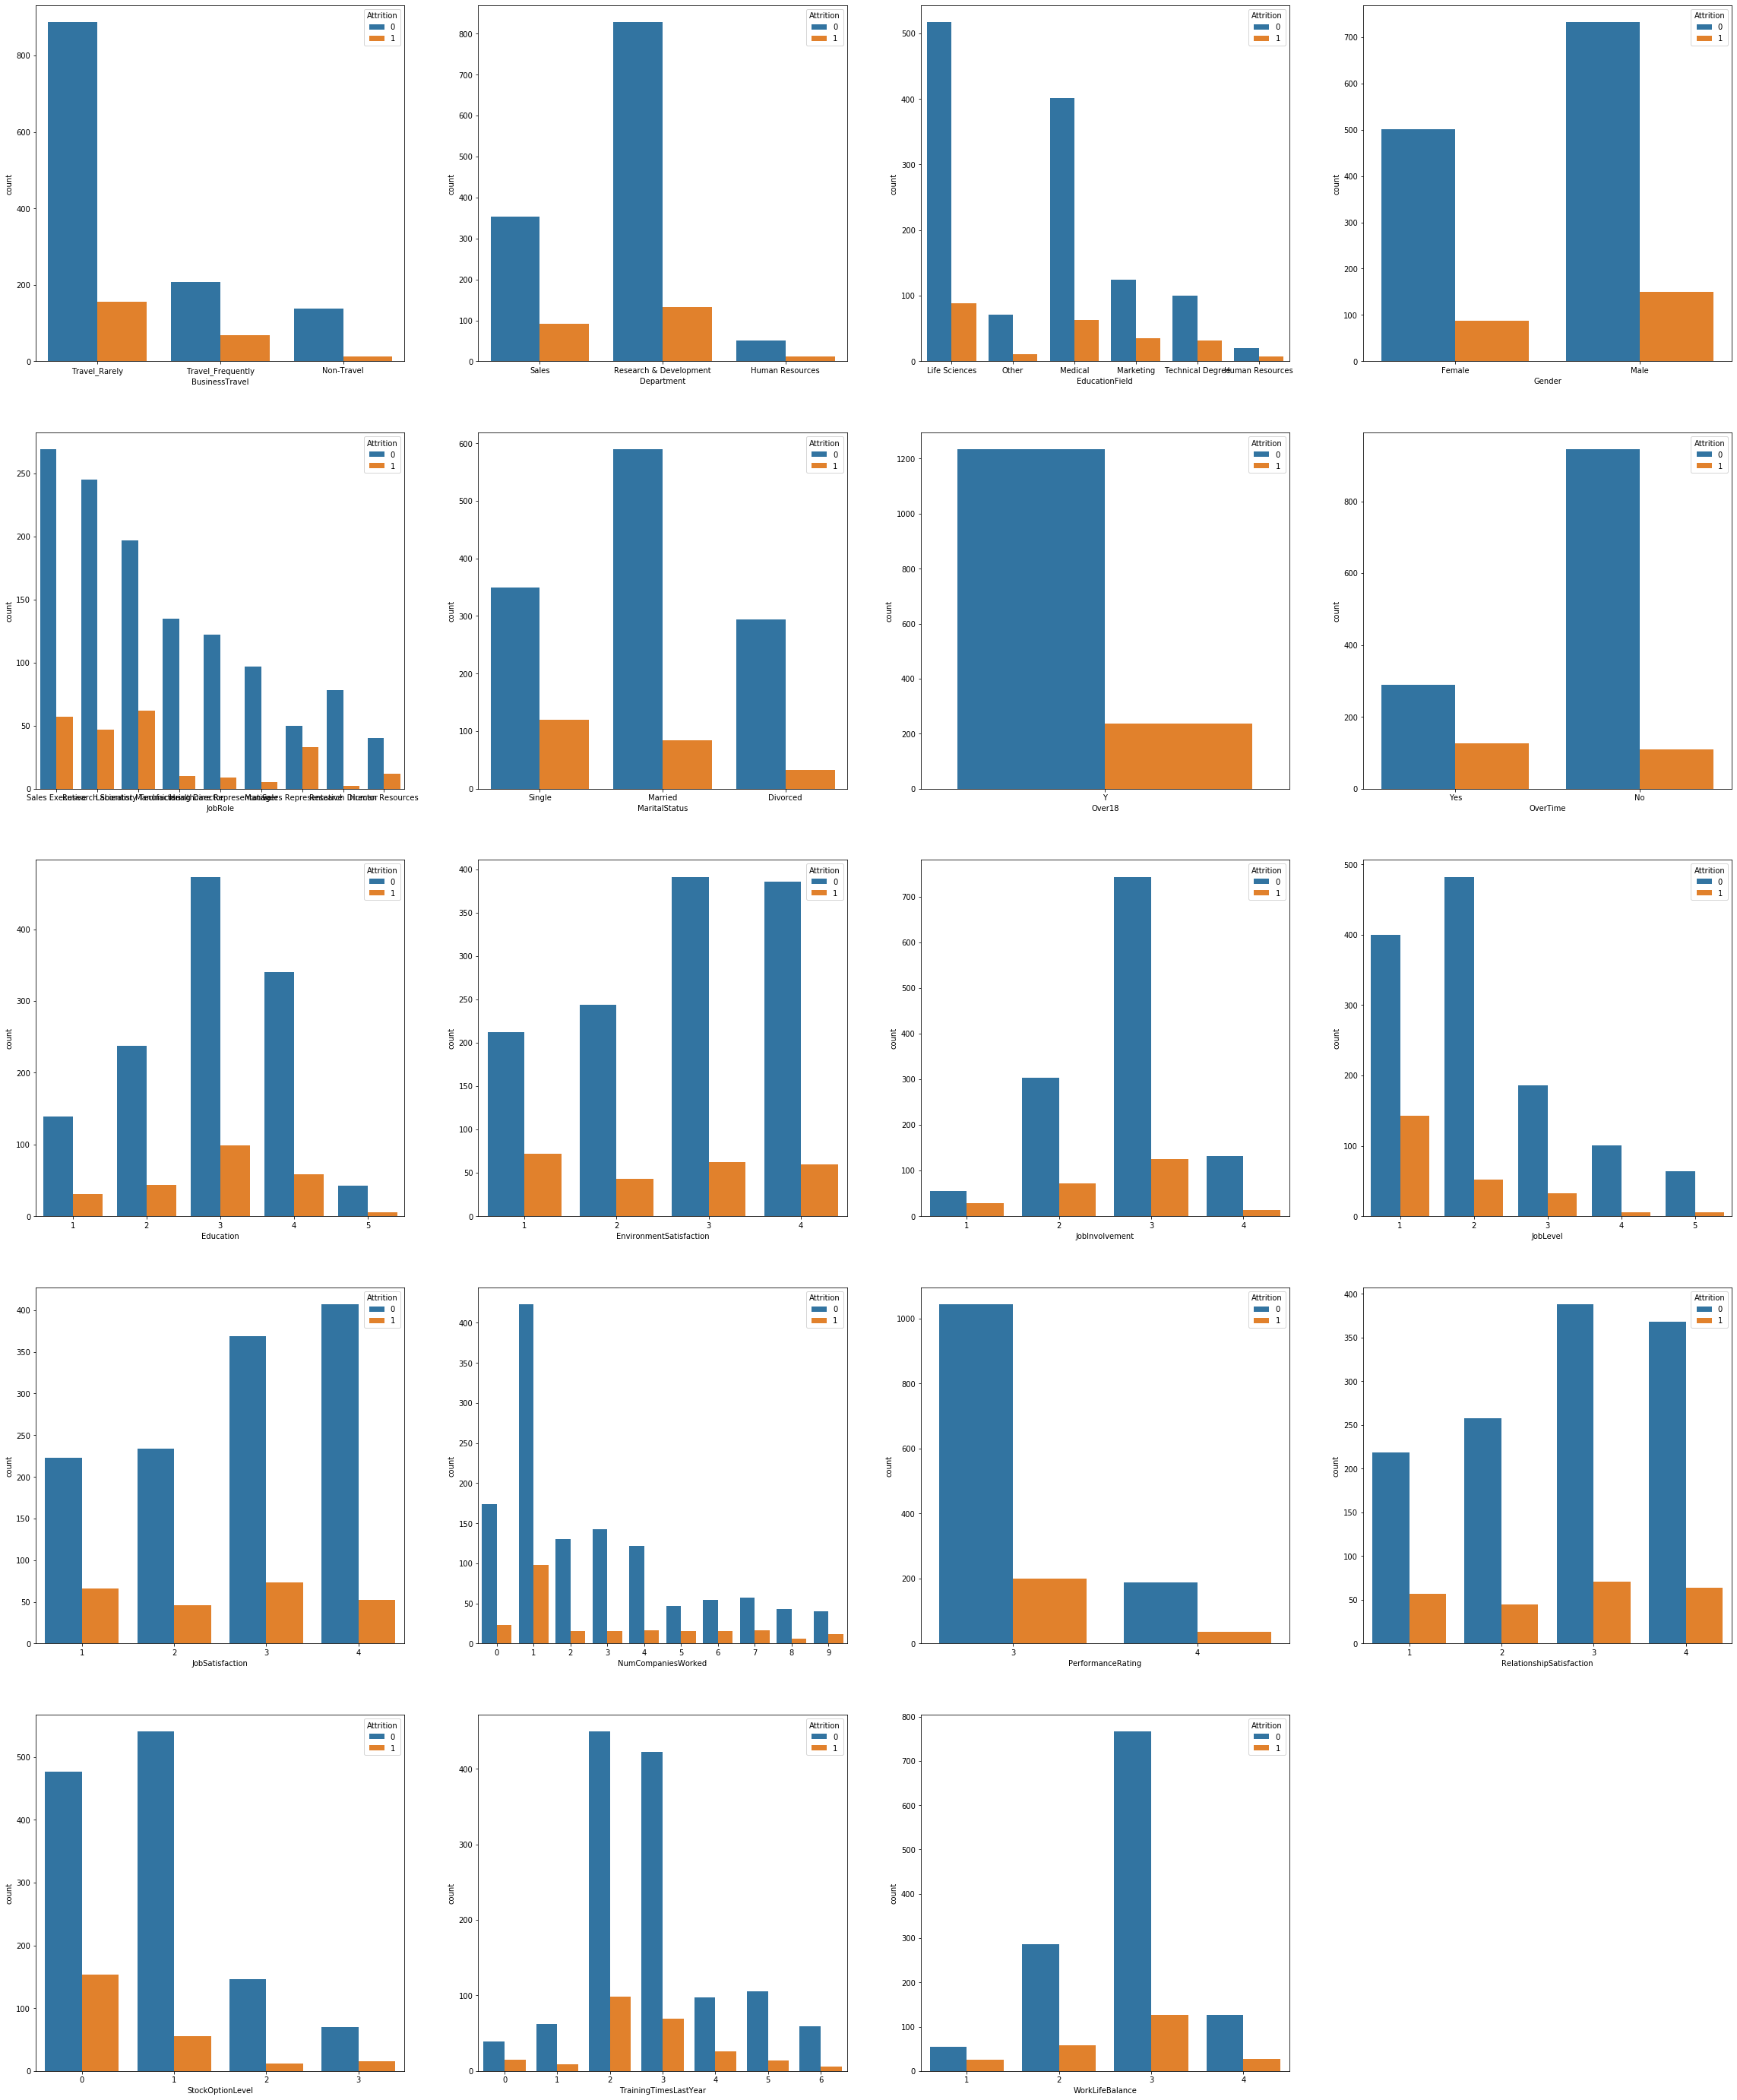

In [28]:
plt.figure(figsize=(40,50))
c=1
for i in cat:
    if(i!="Attrition"):
        plt.subplot(5,4,c)
        c=c+1
        sb.countplot(A[i],hue=A["Attrition"])

### KNN

In [29]:
A.head()

Attrition  Age     BusinessTravel  DailyRate              Department  \
0          1   41      Travel_Rarely       1102                   Sales   
1          0   49  Travel_Frequently        279  Research & Development   
2          1   37      Travel_Rarely       1373  Research & Development   
3          0   33  Travel_Frequently       1392  Research & Development   
4          0   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0  Female  ...                         1                 0                  8   
1    Male  ...                         4                 1                 10   
2    Male  ...                         2                 0                  7   
3  Female  ...                         3                 0                  8   
4    Male  ...                         4                 1                  6   

  TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                     0                1              6                   4   
1                     3                3             10                   7   
2                     3                3              0                   0   
3                     3                3              8                   7   
4                     3                3              2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager   Age Group  
0                        0                     5      Senior  
1                        1                     7      Senior  
2                        0                     0  Middle Age  
3                        3                     0  Middle Age  
4                        2                     2  Middle Age  

[5 rows x 33 columns]

### Label encode all categorical variables in A for Analysis

In [30]:
Y=A[["MonthlyRate"]]
X=A.drop(labels=["MonthlyRate"],axis=1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=X.apply(le.fit_transform)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

### KNN

In [31]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=11)
model=knn.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae


6499.36827458256

In [32]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
tp={"n_neighbors":range(2,30,1)}
cv=GridSearchCV(knn,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
p=cvmodel.best_params_

In [33]:
p

{'n_neighbors': 27}

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=p["n_neighbors"])
model=knn.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae

6330.427815570672

### Decision tree

In [35]:
Y=A[["MonthlyRate"]]
X=A.drop(labels=["MonthlyRate"],axis=1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=X.apply(le.fit_transform)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=10,random_state=30)
model=dtr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae

7162.563891664128

In [37]:
f=[]
f_i=[]
i=0
for col in X.columns:
    f.append(col)
    f_i.append(dtr.feature_importances_[i])
    i=i+1
df=pd.DataFrame(zip(f,f_i),columns=["feature","feature imp"]).sort_values("feature imp",ascending=False)
df=df[df["feature imp"]>0.0]["feature"]
df

5             DistanceFromHome
3                    DailyRate
16               MonthlyIncome
10                  HourlyRate
24           TotalWorkingYears
27              YearsAtCompany
1                          Age
28          YearsInCurrentRole
26             WorkLifeBalance
25       TrainingTimesLastYear
11              JobInvolvement
7               EducationField
22    RelationshipSatisfaction
23            StockOptionLevel
14             JobSatisfaction
8      EnvironmentSatisfaction
20           PercentSalaryHike
29     YearsSinceLastPromotion
30        YearsWithCurrManager
17          NumCompaniesWorked
15               MaritalStatus
6                    Education
9                       Gender
12                    JobLevel
19                    OverTime
21           PerformanceRating
2               BusinessTravel
31                   Age Group
13                     JobRole
4                   Department
Name: feature, dtype: object

In [38]:
Y=A[["MonthlyRate"]]
X=X[df]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=10,random_state=30)
model=dtr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae

7258.829764680001

In [40]:
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor()
tp={"max_depth":range(2,30,1)}
cv=GridSearchCV(dtr,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
p=cvmodel.best_params_

In [41]:
p

{'max_depth': 2}

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=p["max_depth"],random_state=30)
model=dtr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae

6234.303595437614

### Random Forest

In [43]:
Y=A[["MonthlyRate"]]
X=A.drop(labels=["MonthlyRate"],axis=1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=X.apply(le.fit_transform)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,random_state=30)
model=rf.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


6660.854421768709

In [45]:
f=[]
f_i=[]
i=0
for col in X.columns:
    f.append(col)
    f_i.append(rf.feature_importances_[i])
    i=i+1
df=pd.DataFrame(zip(f,f_i),columns=["feature","feature imp"]).sort_values("feature imp",ascending=False)
df=df[df["feature imp"]>0.0]["feature"]
df

3                    DailyRate
16               MonthlyIncome
10                  HourlyRate
1                          Age
20           PercentSalaryHike
5             DistanceFromHome
30        YearsWithCurrManager
24           TotalWorkingYears
27              YearsAtCompany
7               EducationField
25       TrainingTimesLastYear
17          NumCompaniesWorked
28          YearsInCurrentRole
29     YearsSinceLastPromotion
6                    Education
11              JobInvolvement
22    RelationshipSatisfaction
8      EnvironmentSatisfaction
26             WorkLifeBalance
14             JobSatisfaction
13                     JobRole
9                       Gender
15               MaritalStatus
23            StockOptionLevel
2               BusinessTravel
4                   Department
19                    OverTime
0                    Attrition
12                    JobLevel
31                   Age Group
21           PerformanceRating
Name: feature, dtype: object

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,random_state=30)
model=rf.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


6660.854421768709

In [47]:
Y=A["MonthlyRate"]
X=X[df]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,random_state=30)
model=rf.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae

6636.209863945578

In [49]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
tp={"n_estimators":range(2,50,1)}
cv=GridSearchCV(rf,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
p=cvmodel.best_params_

In [50]:
p

{'n_estimators': 45}

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(p["n_estimators"],random_state=30)
model=rf.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae

6400.883975812548

### Adaboost Regressor

In [52]:
X=A.drop("MonthlyRate",axis=1)
Y=A["MonthlyRate"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=X.apply(le.fit_transform)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [53]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=10,random_state=30)
model=abr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae

6157.778591100573

In [54]:
from sklearn.model_selection import GridSearchCV
abr=AdaBoostRegressor()
tp={"n_estimators":range(2,30,1)}
cv=GridSearchCV(abr,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
p=cvmodel.best_params_

In [55]:
p

{'n_estimators': 29}

In [56]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=p["n_estimators"],random_state=30)
model=abr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mae

6168.8963438467545

#### Since the MAE is least for AdaBoostRegressor for 7 trees, we will use ABR with n_estimators=7 for prediction of MonthlyRate

### Y=A[["Attrition"]]

In [57]:
#As we can see that the relationship between Attrition and most of the categorical variables is linear so we can use Linear Algorithms for predicting Attrition.
#We will use:
# Logistic Regression
# Naive Bayes
# DTC
# RFC
# ABC

In [58]:
Y=A[["Attrition"]]
X=A.drop(labels=["Attrition"],axis=1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=X.apply(le.fit_transform)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

### Logistic regression

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
acc=accuracy_score(ytest,pred)
con=confusion_matrix(ytest,pred)
r=recall_score(ytest,pred)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
acc

0.8367346938775511

In [61]:
con

array([[244,   5],
       [ 43,   2]], dtype=int64)

In [62]:
r

0.044444444444444446

### Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model=nb.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
acc=accuracy_score(ytest,pred)
con=confusion_matrix(ytest,pred)
r=recall_score(ytest,pred)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
acc

0.8095238095238095

In [65]:
con

array([[212,  37],
       [ 19,  26]], dtype=int64)

In [66]:
r

0.5777777777777777

### Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=10,random_state=30)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
acc=accuracy_score(ytest,pred)
con=confusion_matrix(ytest,pred)
r=recall_score(ytest,pred)

In [68]:
acc

0.8333333333333334

In [69]:
con

array([[235,  14],
       [ 35,  10]], dtype=int64)

In [70]:
r

0.2222222222222222

In [71]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
tp={"max_depth":range(2,30,1)}
cv=GridSearchCV(dtc,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
p=cvmodel.best_params_

In [72]:
p

{'max_depth': 2}

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=p["max_depth"],random_state=30)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
acc=accuracy_score(ytest,pred)
con=confusion_matrix(ytest,pred)
r=recall_score(ytest,pred)

In [74]:
acc

0.8571428571428571

In [75]:
r

0.1111111111111111

In [76]:
con

array([[247,   2],
       [ 40,   5]], dtype=int64)

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,random_state=30)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
acc=accuracy_score(ytest,pred)
con=confusion_matrix(ytest,pred)
r=recall_score(ytest,pred)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
acc

0.8571428571428571

In [79]:
con

array([[246,   3],
       [ 39,   6]], dtype=int64)

In [80]:
r

0.13333333333333333

In [81]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=30)
tp={"n_estimators":range(2,30,1)}
cv=GridSearchCV(rfc,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
p=cvmodel.best_params_

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

In [82]:
p

{'n_estimators': 29}

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=p["n_estimators"])
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
acc=accuracy_score(ytest,pred)
con=confusion_matrix(ytest,pred)
r=recall_score(ytest,pred)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
acc

0.8571428571428571

In [85]:
con

array([[247,   2],
       [ 40,   5]], dtype=int64)

In [86]:
r

0.1111111111111111

### Adaboost Classifier

In [87]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=10,random_state=30)
model=abc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
acc=accuracy_score(ytest,pred)
con=confusion_matrix(ytest,pred)
r=recall_score(ytest,pred)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
acc

0.8639455782312925

In [89]:
con

array([[241,   8],
       [ 32,  13]], dtype=int64)

In [90]:
r

0.28888888888888886

In [91]:
from sklearn.model_selection import GridSearchCV
abc=AdaBoostClassifier(random_state=30)
tp={"n_estimators":range(2,40,1)}
cv=GridSearchCV(abc,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
p=cvmodel.best_params_

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [92]:
p

{'n_estimators': 32}

In [93]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=p["n_estimators"],random_state=30)
model=abc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
acc=accuracy_score(ytest,pred)
con=confusion_matrix(ytest,pred)
r=recall_score(ytest,pred)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
acc

0.8673469387755102

In [95]:
con

array([[239,  10],
       [ 29,  16]], dtype=int64)

In [96]:
r

0.35555555555555557

### KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
model = knn.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
r=recall_score(ytest,pred)
con=confusion_matrix(ytest,pred)
acc=accuracy_score(ytest,pred)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
acc

0.8401360544217688

In [99]:
con

array([[247,   2],
       [ 45,   0]], dtype=int64)

In [100]:
r

0.0

In [101]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
tp={"n_neighbors":range(2,40,1)}
cv=GridSearchCV(knn,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
p=cvmodel.best_params_

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConv

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConv

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConv

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConv

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConv

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pratha Purwar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConv

In [102]:
p

{'n_neighbors': 24}

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=p["n_neighbors"])
model = knn.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
r=recall_score(ytest,pred)
con=confusion_matrix(ytest,pred)
acc=accuracy_score(ytest,pred)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
acc

0.8469387755102041

In [105]:
con

array([[249,   0],
       [ 45,   0]], dtype=int64)

In [106]:
r

0.0

#### The best model in terms of Accuracy is Adaboost Classifier, however since we need to predict 1 more accurately(We need to find if an employee will leave or not) so we will use Naive Bayes since recall is max for it. If accuracy is more important, we will use Adaboost classifier

### Clustering

In [107]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [108]:
A

Attrition  Age     BusinessTravel  DailyRate              Department  \
0             1   41      Travel_Rarely       1102                   Sales   
1             0   49  Travel_Frequently        279  Research & Development   
2             1   37      Travel_Rarely       1373  Research & Development   
3             0   33  Travel_Frequently       1392  Research & Development   
4             0   27      Travel_Rarely        591  Research & Development   
...         ...  ...                ...        ...                     ...   
1465          0   36  Travel_Frequently        884  Research & Development   
1466          0   39      Travel_Rarely        613  Research & Development   
1467          0   27      Travel_Rarely        155  Research & Development   
1468          0   49  Travel_Frequently       1023                   Sales   
1469          0   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  RelationshipSatisfaction  StockOptionLevel  \
0     Female  ...                         1                 0   
1       Male  ...                         4                 1   
2       Male  ...                         2                 0   
3     Female  ...                         3                 0   
4       Male  ...                         4                 1   
...      ...  ...                       ...               ...   
1465    Male  ...                         3                 1   
1466    Male  ...                         1                 1   
1467    Male  ...                         2                 1   
1468    Male  ...                         4                 0   
1469    Male  ...                         1                 0   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                     8                     0                1              6   
1                    10                     3                3             10   
2                     7                     3                3              0   
3                     8                     3                3              8   
4                     6                     3                3              2   
...                 ...                   ...              ...            ...   
1465                 17                     3                3              5   
1466                  9                     5                3              7   
1467                  6                     0                3              6   
1468                 17                     3                2              9   
1469                  6                     3                4              4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                      4                        0                     5   
1                      7                        1                     7   
2                      0                        0                     0   
3                      7                        3                     0   
4              

In [176]:
A[cont]

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0      41       1102                 1          94           5993   
1      49        279                 8          61           5130   
2      37       1373                 2          92           2090   
3      33       1392                 3          56           2909   
4      27        591                 2          40           3468   
...   ...        ...               ...         ...            ...   
1465   36        884                23          41           2571   
1466   39        613                 6          42           9991   
1467   27        155                 4          87           6142   
1468   49       1023                 2          63           5390   
1469   34        628                 8          82           4404   

      MonthlyRate  PercentSalaryHike  TotalWorkingYears  YearsAtCompany  \
0           19479                 11                  8               6   
1           24907                 23                 10              10   
2            2396                 15                  7               0   
3           23159                 11                  8               8   
4           16632                 12                  6               2   
...           ...                ...                ...             ...   
1465        12290                 17                 17               5   
1466        21457                 15                  9               7   
1467         5174                 20                  6               6   
1468        13243                 14                 17               9   
1469        10228                 12                  6               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                      4                        0                     5  
1                      7                        1                     7  
2                      0                        0                     0  
3                      7                        3                     0  
4                      2                        2                     2  
...                  ...                      ...                   ...  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2  

[1470 rows x 12 columns]

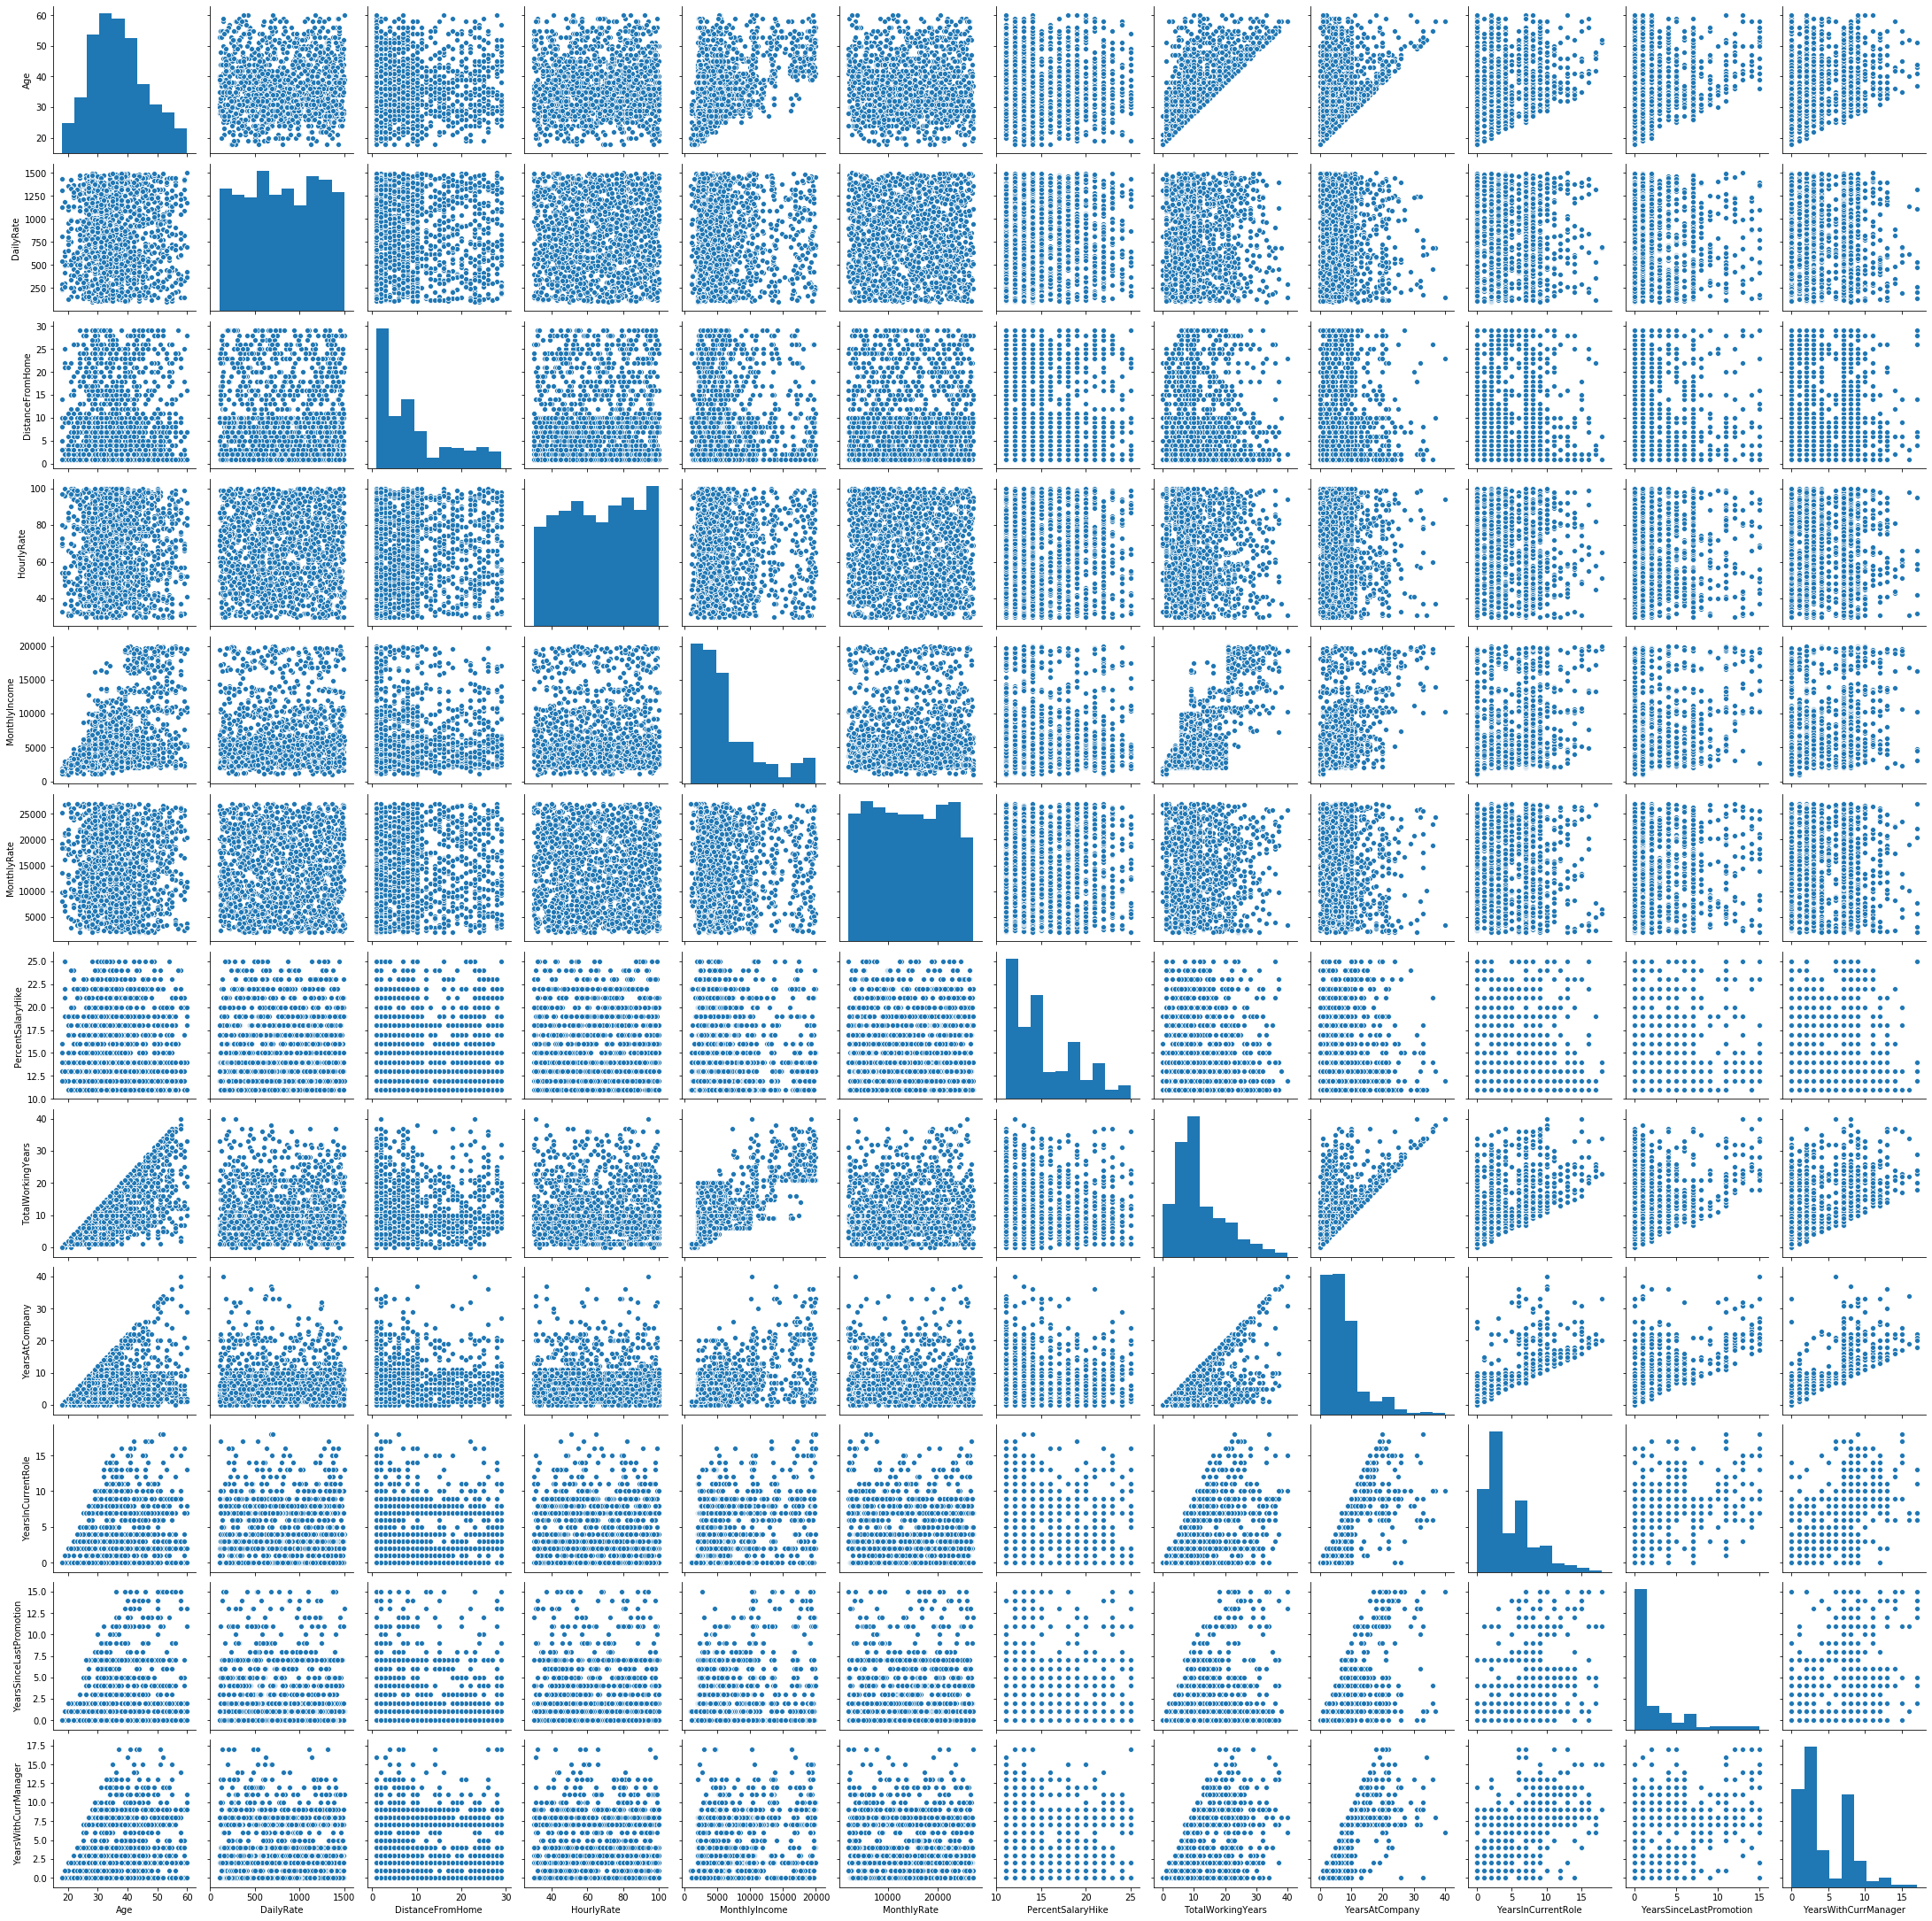

In [126]:
sb.pairplot(A[cont])

In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
B=A.apply(le.fit_transform)

In [148]:
X=B[["DistanceFromHome","YearsAtCompany"]]
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
model=km.fit(X)
X["cluster"]=model.labels_
X

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


DistanceFromHome  YearsAtCompany  cluster
0                    0               6        0
1                    7              10        3
2                    1               0        0
3                    2               8        0
4                    1               2        0
...                ...             ...      ...
1465                22               5        1
1466                 5               7        0
1467                 3               6        0
1468                 1               9        0
1469                 7               4        3

[1470 rows x 3 columns]

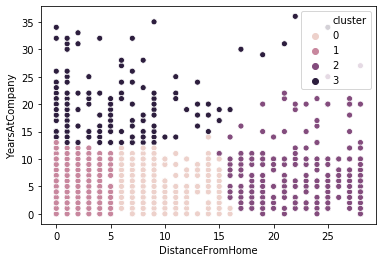

In [143]:
sb.scatterplot(X.DistanceFromHome,X.YearsAtCompany,hue=X.cluster)

In [145]:
#From here we can conclude that a majority of the employees that tend to stay with the company for more than 15 years are located in the vicinity of the Company ie. within 15 km from the office. 

In [158]:
X=B[["MonthlyIncome","YearsAtCompany"]]
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
model=km.fit(X)
X["cluster"]=model.labels_
X

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


MonthlyIncome  YearsAtCompany  cluster
0               809               6        0
1               682              10        0
2                62               0        1
3               313               8        1
4               399               2        3
...             ...             ...      ...
1465            210               5        1
1466           1070               7        2
1467            821               6        0
1468            730               9        0
1469            554               4        3

[1470 rows x 3 columns]

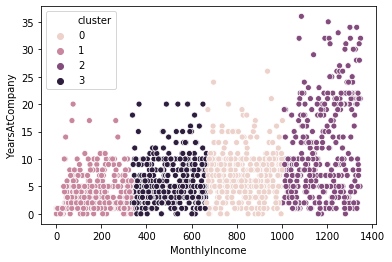

In [159]:
sb.scatterplot(X.MonthlyIncome,X.YearsAtCompany,hue=X.cluster)

In [162]:
#Let us consider TotalWorkingYears instead of YearsAtCompany

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


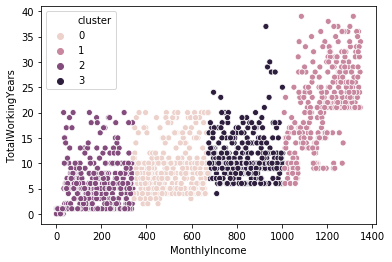

In [163]:
X=B[["MonthlyIncome","TotalWorkingYears"]]
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
model=km.fit(X)
X["cluster"]=model.labels_
sb.scatterplot(X.MonthlyIncome,X.TotalWorkingYears,hue=X.cluster)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


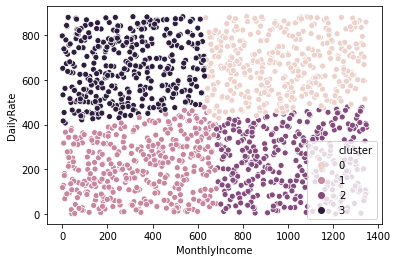

In [164]:
X=B[["MonthlyIncome","DailyRate"]]
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
model=km.fit(X)
X["cluster"]=model.labels_
sb.scatterplot(X.MonthlyIncome,X.DailyRate,hue=X.cluster)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


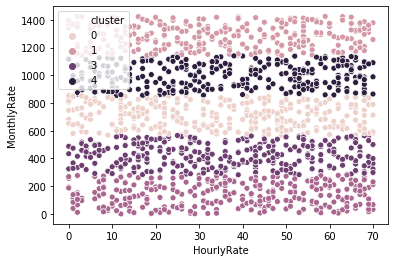

In [185]:
X=B[["HourlyRate","MonthlyRate"]]
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
model=km.fit(X)
X["cluster"]=model.labels_
sb.scatterplot(X.HourlyRate,X.MonthlyRate,hue=X.cluster)

C:\Users\Pratha Purwar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


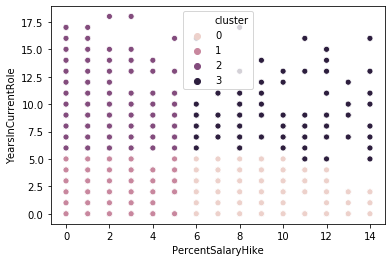

In [181]:
X=B[["PercentSalaryHike","YearsInCurrentRole"]]
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
model=km.fit(X)
X["cluster"]=model.labels_
sb.scatterplot(X.PercentSalaryHike,X.YearsInCurrentRole,hue=X.cluster)